# PyTorch software benchmark analysis

Single node throughput comparisons between installation versions

In [1]:
import os
import re
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
ls /global/cscratch1/sd/sfarrell/pytorch-benchmarks/results

gpu-1.7.0-nccl-n1/         gpu-v1.2.0-nccl-n1/  hsw-1.7.1-mpi-n4/
gpu-1.7.1-gloo-n1/         gpu-v1.3.1-nccl-n1/  hsw-1.7.1-mpi-n64/
gpu-1.7.1-gloo-n16/        gpu-v1.4.0-nccl-n1/  hsw-1.7.1-mpi-n8/
gpu-1.7.1-gloo-n2/         gpu-v1.5.1-nccl-n1/  hsw-v1.2.0-mpi-n1/
gpu-1.7.1-gloo-n32/        gpu-v1.6.0-nccl-n1/  hsw-v1.3.1-mpi-n1/
gpu-1.7.1-gloo-n4/         hsw-1.7.1-gloo-n1/   hsw-v1.4.0-mpi-n1/
gpu-1.7.1-gloo-n64/        hsw-1.7.1-gloo-n16/  hsw-v1.5.0-mpi-n1/
gpu-1.7.1-gloo-n8/         hsw-1.7.1-gloo-n2/   hsw-v1.6.0-mpi-n1/
gpu-1.7.1-nccl-n1/         hsw-1.7.1-gloo-n32/  knl-1.7.1-mpi-n1/
gpu-1.7.1-nccl-n16/        hsw-1.7.1-gloo-n4/   knl-1.7.1-mpi-n16/
gpu-1.7.1-nccl-n2/         hsw-1.7.1-gloo-n64/  knl-1.7.1-mpi-n2/
gpu-1.7.1-nccl-n32/        hsw-1.7.1-gloo-n8/   knl-1.7.1-mpi-n32/
gpu-1.7.1-nccl-n4/         hsw-1.7.1-mpi-n1/    knl-1.7.1-mpi-n4/
gpu-1.7.1-nccl-n64/        hsw-1.7.1-mpi-n16/   knl-1.7.1-mpi-n64/
gpu-1.7.1-nccl-n8/         hsw-1.7.1-mpi-n2/    knl-1.7.1-mpi-n8/
g

In [5]:
versions = [
    'v1.2.0',
    'v1.3.1',
    'v1.4.0',
    'v1.5.1',
    'v1.6.0',
    '1.7.0',
    '1.7.1',
    #'ngc_20.10_v0',
]

results_files = [f'/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-{version}-nccl-n1/results.txt'
                 for version in versions]
results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.2.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.3.1-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.4.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.5.1-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.6.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-1.7.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-1.7.1-nccl-n1/results.txt']

In [7]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True, sort=False)
results.version = results.version.apply(lambda s: s.lstrip('v'))

results

,train_rate,inference_rate,ranks,hardware,version,backend,model
0,258.230068,730.743801,1,gpu,1.2.0,nccl,transformer
1,7723.494071,13916.486859,1,gpu,1.2.0,nccl,lstm
2,1299.088126,1854.944133,1,gpu,1.2.0,nccl,alexnet
3,306.332133,783.778160,1,gpu,1.2.0,nccl,resnet50
4,278.594783,662.752279,1,gpu,1.2.0,nccl,cnn3d
5,254.326376,739.456821,1,gpu,1.3.1,nccl,transformer
6,7734.052869,13861.288332,1,gpu,1.3.1,nccl,lstm
7,1299.208304,1828.922037,1,gpu,1.3.1,nccl,alexnet
8,304.852193,788.917250,1,gpu,1.3.1,nccl,resnet50
9,277.718024,660.273581,1,gpu,1.3.1,nccl,cnn3d


## Training throughput comparisons

In [9]:
models = results.model.unique()

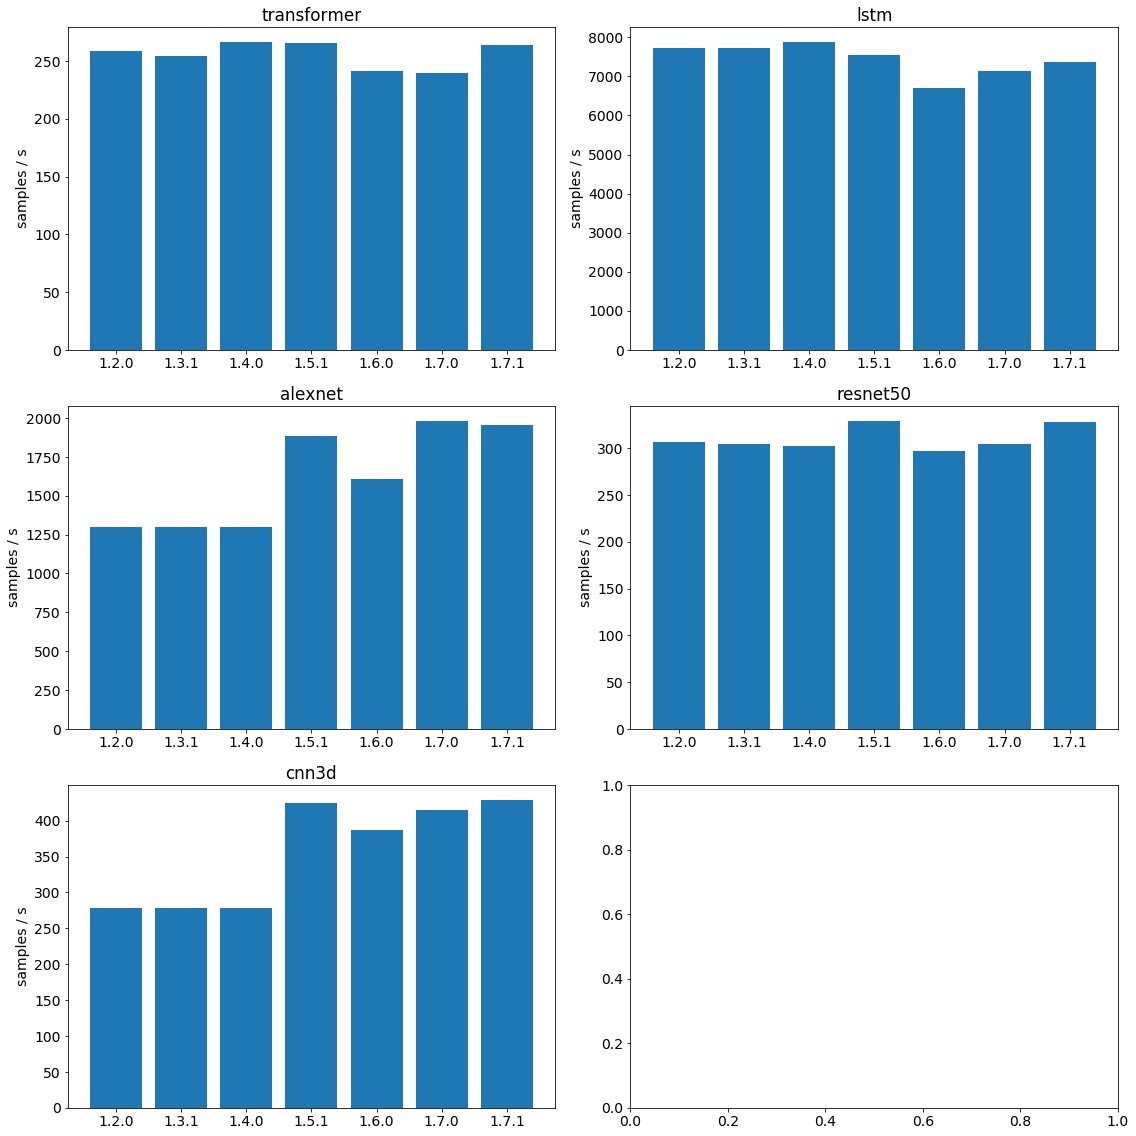

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model] #.sort_values('version')
    ax.bar(model_results.version, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()

## Inference throughput comparisons

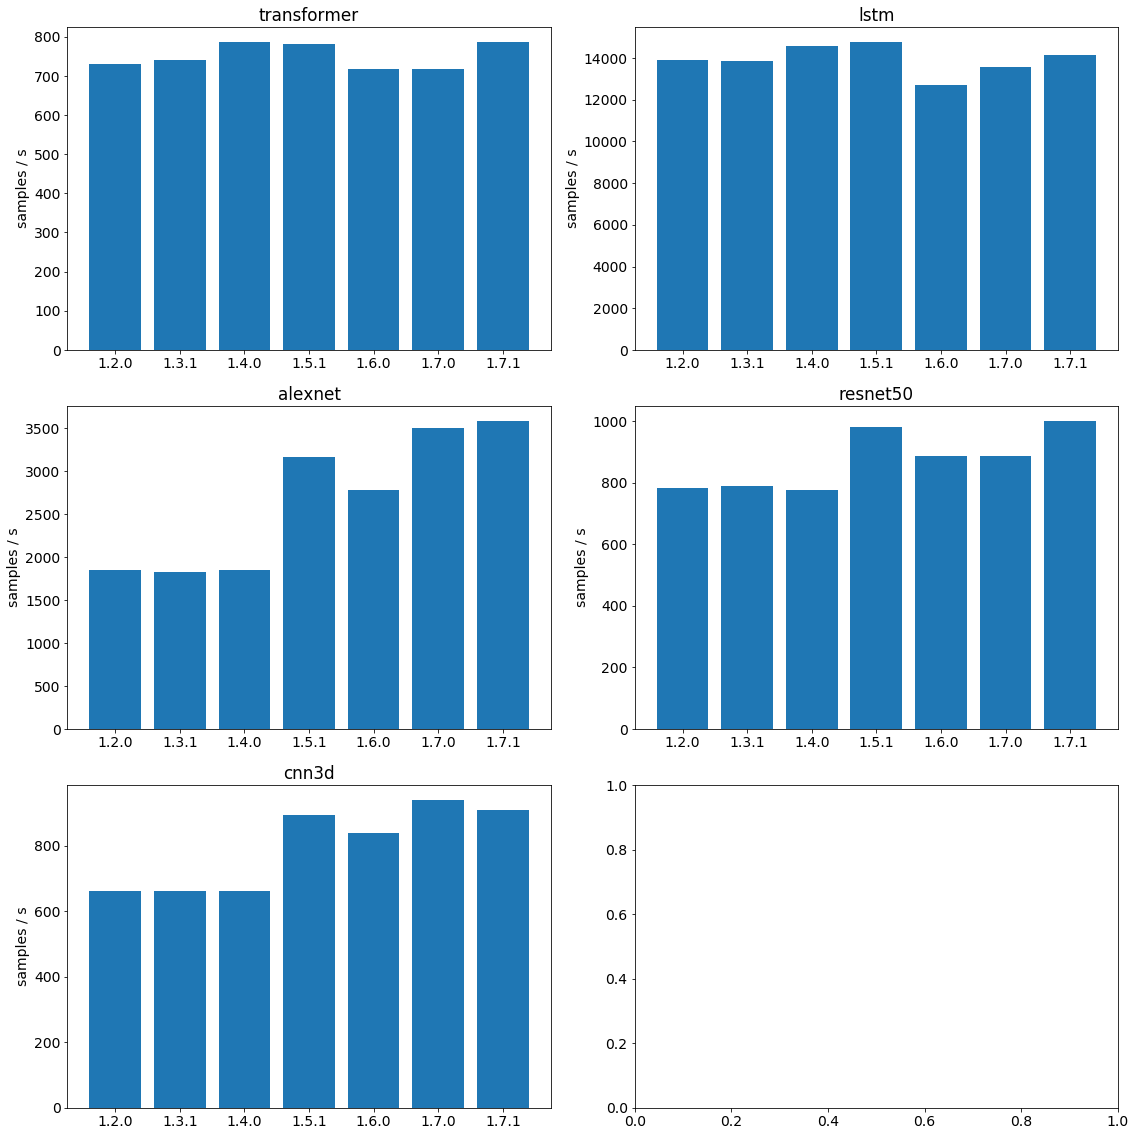

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model] #.sort_values('version')
    ax.bar(model_results.version, model_results.inference_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()